# TF-IDF

In [1]:
# https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
data = pd.read_csv("data/samsung_galaxynote10.csv")
data.head(5)

,contents
0,I've been a happy owner of a 2nd generation Ec...
1,Sound quality is the best I've heard on a spea...
2,I cannot say enough about this amazon echo dot...
3,I had no idea I'd love Alexa so much - I wake ...
4,I was excited when they said it had a better s...


In [4]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(data.contents)
text = tfidf.transform(data.contents)

In [6]:
print(text)

  (0, 322)	0.040869066775381255
  (0, 321)	0.020434533387690627
  (0, 318)	0.014868325092975372
  (0, 316)	0.03653492716052473
  (0, 314)	0.01961065168401743
  (0, 313)	0.03438989718543917
  (0, 311)	0.020434533387690627
  (0, 310)	0.03438989718543917
  (0, 307)	0.1192746518667242
  (0, 306)	0.017194948592719583
  (0, 305)	0.03540869662768076
  (0, 304)	0.040869066775381255
  (0, 303)	0.047718064137215965
  (0, 302)	0.08818230665030555
  (0, 301)	0.017194948592719583
  (0, 300)	0.014562833275316923
  (0, 298)	0.04282158841648541
  (0, 296)	0.040869066775381255
  (0, 294)	0.16565707482053338
  (0, 291)	0.018896972890173454
  (0, 290)	0.01961065168401743
  (0, 289)	0.01961065168401743
  (0, 286)	0.03181204275814398
  (0, 283)	0.01961065168401743
  (0, 282)	0.020434533387690627
  :	:
  (99, 180)	0.13346552910311354
  (99, 179)	0.14783633696463935
  (99, 168)	0.13346552910311354
  (99, 167)	0.11208595991413849
  (99, 165)	0.1145285895594418
  (99, 164)	0.12611960221302546
  (99, 153)	0.129

In [7]:
type(text)

scipy.sparse.csr.csr_matrix

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters


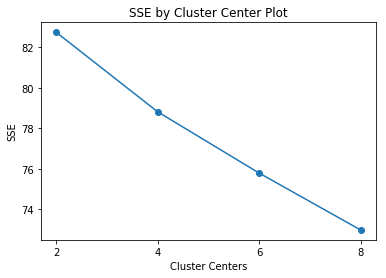

In [9]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 8)

In [10]:
clusters = MiniBatchKMeans(n_clusters=8, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

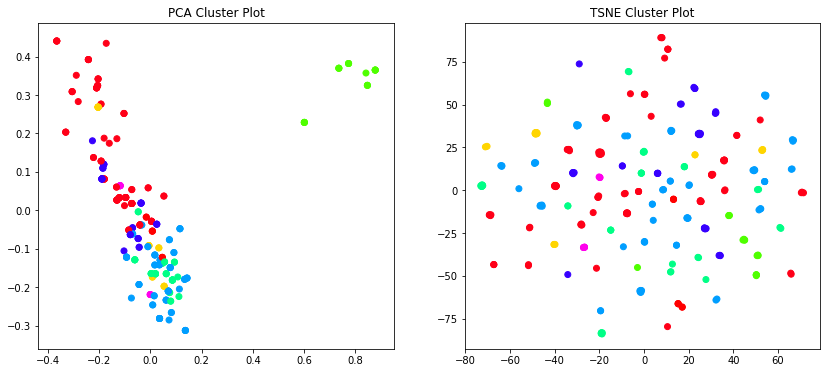

In [11]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=True)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [12]:
# 최적 하이퍼파라미터 수
# kmeans = 8, pca=8

def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
does,playing,change,minutes,respond,happens,sound,music,return,distorted

Cluster 1
fix,devices,need,i_e,multi,it_,issue,echo,support,device

Cluster 2
dot,echo,google,skills,alexa,es,para,la,en,que

Cluster 3
dot,want,buy,device,home,google,app,phone,amazon,alexa

Cluster 4
home,wifi,voice,commands,like,just,music,play,work,alexa

Cluster 5
really,time,smart,devices,older,speaker,quality,dot,sound,echo

Cluster 6
sound,turn,second,echo,voice,fine,light,simple,service,customer

Cluster 7
usb,better,power,generation,3rd,echo,2nd,sound,dot,gen
